In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.csv',index_col=0)

In [3]:
data.head()

,infected
date,
2020-01-20,291
2020-01-21,440
2020-01-22,579
2020-01-23,844
2020-01-24,1312


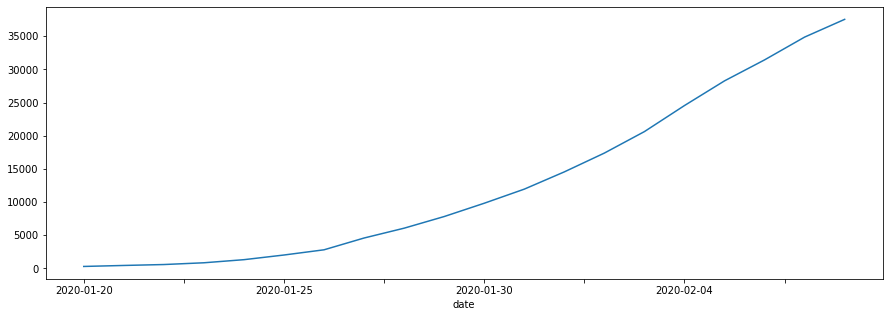

In [4]:
data.infected.plot(figsize=(15, 5))

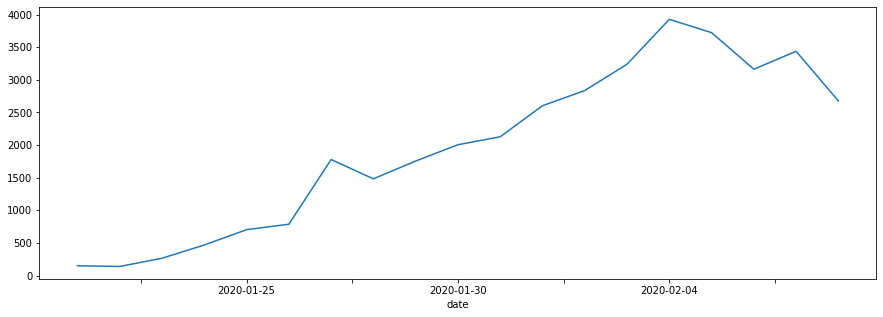

In [5]:
(data.infected - data.infected.shift(1)).plot(figsize=(15, 5))

In [6]:
from pyramid.arima import auto_arima

In [7]:
stepwise_model = auto_arima(data, m=12,
                           start_P=0, seasonal=False,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True) 

Fit ARIMA: order=(2, 2, 2); AIC=274.118, BIC=279.460, Fit time=1.114 seconds
Fit ARIMA: order=(0, 2, 0); AIC=270.987, BIC=272.767, Fit time=0.014 seconds
Fit ARIMA: order=(1, 2, 0); AIC=272.448, BIC=275.119, Fit time=0.234 seconds
Fit ARIMA: order=(0, 2, 1); AIC=272.608, BIC=275.279, Fit time=0.248 seconds
Fit ARIMA: order=(1, 2, 1); AIC=274.350, BIC=277.912, Fit time=0.532 seconds
Total fit time: 2.173 seconds


In [8]:
stepwise_model.aic()

270.9867563573257

In [9]:
stepwise_model.fit(data)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [10]:
predicted_days = 60

In [11]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [12]:
for x in range (0, predicted_days):
    print(str(datetime.datetime(2020,2,9) + datetime.timedelta(days = x)) + " - " +str(int(future_forecast[x])))

2020-02-09 00:00:00 - 40368
2020-02-10 00:00:00 - 43325
2020-02-11 00:00:00 - 46422
2020-02-12 00:00:00 - 49659
2020-02-13 00:00:00 - 53037
2020-02-14 00:00:00 - 56556
2020-02-15 00:00:00 - 60214
2020-02-16 00:00:00 - 64014
2020-02-17 00:00:00 - 67953
2020-02-18 00:00:00 - 72033
2020-02-19 00:00:00 - 76253
2020-02-20 00:00:00 - 80614
2020-02-21 00:00:00 - 85115
2020-02-22 00:00:00 - 89756
2020-02-23 00:00:00 - 94538
2020-02-24 00:00:00 - 99460
2020-02-25 00:00:00 - 104523
2020-02-26 00:00:00 - 109726
2020-02-27 00:00:00 - 115069
2020-02-28 00:00:00 - 120553
2020-02-29 00:00:00 - 126177
2020-03-01 00:00:00 - 131942
2020-03-02 00:00:00 - 137847
2020-03-03 00:00:00 - 143892
2020-03-04 00:00:00 - 150078
2020-03-05 00:00:00 - 156404
2020-03-06 00:00:00 - 162870
2020-03-07 00:00:00 - 169477
2020-03-08 00:00:00 - 176225
2020-03-09 00:00:00 - 183112
2020-03-10 00:00:00 - 190140
2020-03-11 00:00:00 - 197309
2020-03-12 00:00:00 - 204618
2020-03-13 00:00:00 - 212067
2020-03-14 00:00:00 - 219656
2